## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import matplotlib.pyplot as plt
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
tensorflow.__version__

'2.12.0'

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train.shape[0]

60000

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

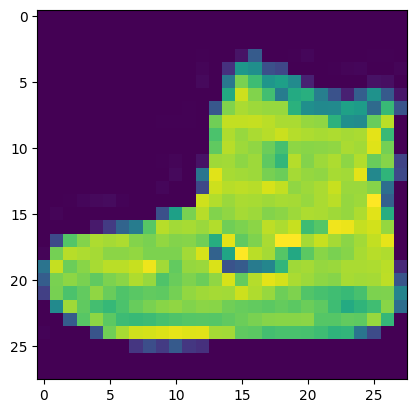

Label:  9


In [ ]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


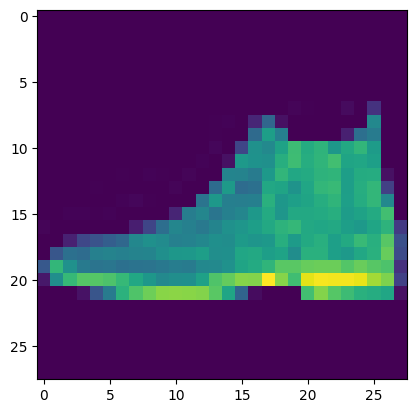

Label:  9


In [ ]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
X_train.shape[0]

60000

In [ ]:
X_train[0].shape


(28, 28)

### Data Pre-processing

In [ ]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
X_train[0].shape

(784,)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP model without any alterations

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()

In [ ]:
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
300/300 [==============================] - 6s 3ms/step - loss: 2.3145 - accuracy: 0.1093
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2976 - accuracy: 0.1598
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2945 - accuracy: 0.1783
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2914 - accuracy: 0.1958
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2880 - accuracy: 0.2318
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2840 - accuracy: 0.2110
Epoch 7/100
300/300 [==============================] - 2s 6ms/step - loss: 2.2792 - accuracy: 0.2448
Epoch 8/100
300/300 [==============================] - 2s 6ms/step - loss: 2.2731 - accuracy: 0.2572
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2645 - accuracy: 0.2613
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2531 - accura

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9213 - accuracy: 0.6699


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6699000000953674


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [ ]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 2.4613 - accuracy: 0.1000
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3704 - accuracy: 0.1000
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3316 - accuracy: 0.1000
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3126 - accuracy: 0.1002
Epoch 5/100
300/300 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1155
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2973 - accuracy: 0.1367
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2940 - accuracy: 0.1536
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2917 - accuracy: 0.1680
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2899 - accuracy: 0.2132
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2884 - accura

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.9253 - accuracy: 0.3397


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.33970001339912415


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1856 - accuracy: 0.6987
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6001 - accuracy: 0.7846
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5343 - accuracy: 0.8074
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4956 - accuracy: 0.8206
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4685 - accuracy: 0.8302
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4479 - accuracy: 0.8364
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4339 - accuracy: 0.8430
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4227 - accuracy: 0.8456
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4116 - accuracy: 0.8496
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.403

In [ ]:
results = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.9253 - accuracy: 0.3397


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.33970001339912415


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout


Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)


Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.3254 - accuracy: 0.5926
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8662 - accuracy: 0.7361
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7319 - accuracy: 0.7678
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6550 - accuracy: 0.7857
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6057 - accuracy: 0.7986
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5757 - accuracy: 0.8073
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5478 - accuracy: 0.8150
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5267 - accuracy: 0.8210
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5118 - accuracy: 0.8258
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4038 - accuracy: 0.8545


In [ ]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8544999957084656


### Dropout

In [1]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.8511 - accuracy: 0.7089
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6045 - accuracy: 0.7950
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5483 - accuracy: 0.8130
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5188 - accuracy: 0.8233
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4949 - accuracy: 0.8302
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4808 - accuracy: 0.8349
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4638 - accuracy: 0.8403
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4594 - accuracy: 0.8415
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4476 - accuracy: 0.8461
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3663 - accuracy: 0.8682


In [ ]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8682000041007996
